In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import log_loss, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,75)

In [2]:
class evaluation:
    def __init__(self, true_s):
        self.true_df = pd.DataFrame(true_s)
        self.true_df.columns = ['swell']
        self.true_df['swell(t+1)'] = self.true_df['swell'].shift(-1)
        self.true_df['swell(t+2)'] = self.true_df['swell'].shift(-2)
        self.true_df['swell(t-1)'] = self.true_df['swell'].shift(1)
        self.true_df['swell(t-2)'] = self.true_df['swell'].shift(2)
    
        self.swell_columns = ['swell(t+1)','swell(t+2)','swell(t-1)','swell(t-2)']
    
    def _eval_one(self, pred):
        true = self.true_df.loc[pred.name]
        swell = true['swell'] 
        p_swell = pred['pred']

        if swell == 0 and p_swell == 0:
            return 1

        if swell == 1 and p_swell == 1:
            return 2

        if swell == 0 and p_swell == 1:
            if (true[self.swell_columns].values == 1).any():
                return 0
            else:
                return -1

        if swell == 1 and p_swell == 0:
            if (pred[self.swell_columns].values == 1).any():
                return 0
            else: 
                return -2
    
    def evaluate(self, pred):
        pred_df = pd.DataFrame(pred)
        pred_df.columns = ['pred']
        pred_df['swell(t+1)'] = pred_df['pred'].shift(-1)
        pred_df['swell(t+2)'] = pred_df['pred'].shift(-2)
        pred_df['swell(t-1)'] = pred_df['pred'].shift(1)
        pred_df['swell(t-2)'] = pred_df['pred'].shift(2)

        result = []
        for index in pred_df.index:
            result.append(self._eval_one(pred_df.loc[index]))
        
        #print(result)
        print(pd.Series(result).value_counts())
        
        return np.sum(result)

In [3]:
num_values = 7
degrees_week = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_week)
sin_week = np.sin(np.deg2rad(degrees_week))
print(sin_week)
cos_week = np.cos(np.deg2rad(degrees_week))
print(cos_week)

num_values = 12
degrees_month = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_month)
sin_month = np.sin(np.deg2rad(degrees_month))
print(sin_month)
cos_month = np.cos(np.deg2rad(degrees_month))
print(cos_month)

num_values = 31
degrees_day = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_day)
sin_day = np.sin(np.deg2rad(degrees_day))
print(sin_day)
cos_day = np.cos(np.deg2rad(degrees_day))
print(cos_day)

num_values = 24
degrees_hour = np.linspace(0, 360, num_values + 1)[:-1]
print(degrees_hour)
sin_hour = np.sin(np.deg2rad(degrees_hour))
print(sin_hour)
cos_hour = np.cos(np.deg2rad(degrees_hour))
print(cos_hour)

[   0.           51.42857143  102.85714286  154.28571429  205.71428571
  257.14285714  308.57142857]
[ 0.          0.78183148  0.97492791  0.43388374 -0.43388374 -0.97492791
 -0.78183148]
[ 1.          0.6234898  -0.22252093 -0.90096887 -0.90096887 -0.22252093
  0.6234898 ]
[   0.   30.   60.   90.  120.  150.  180.  210.  240.  270.  300.  330.]
[  0.00000000e+00   5.00000000e-01   8.66025404e-01   1.00000000e+00
   8.66025404e-01   5.00000000e-01   1.22464680e-16  -5.00000000e-01
  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01  -5.00000000e-01]
[  1.00000000e+00   8.66025404e-01   5.00000000e-01   6.12323400e-17
  -5.00000000e-01  -8.66025404e-01  -1.00000000e+00  -8.66025404e-01
  -5.00000000e-01  -1.83697020e-16   5.00000000e-01   8.66025404e-01]
[   0.           11.61290323   23.22580645   34.83870968   46.4516129
   58.06451613   69.67741935   81.29032258   92.90322581  104.51612903
  116.12903226  127.74193548  139.35483871  150.96774194  162.58064516
  174.19354839  185.806

In [4]:
def make_coord(date,num_class):
    # 1 ~ 12, 1 ~ 7, 1 ~ 31
    degrees = np.linspace(0,360,num_values + 1)[:-1]
    sin = np.sin(np.deg2rad(degrees))
    cos = np.cos(np.deg2rad(degrees))
    return sin, cos


def date2coord(date, sin, cos):
    return cos[date-1], sin[date-1]


def date2week(x):
    y = int(str(x)[:4])
    m = int(str(x)[4:6])
    d = int(str(x)[6:8])
    day = datetime(y, m, d)
    return day.weekday()

In [5]:
df = pd.read_csv('./all_merged_info_data.tsv',sep='\t',index_col='Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 90 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
22453_일시                 33979 non-null float64
22453_수온(°C)             33082 non-null float64
22453_최대파고(m)            33632 non-null float64
22453_유의파고(m)            33632 non-null float64
22453_평균파고(m)            33632 non-null float64
22453_파주기(sec)           33634 non-null float64
22490_일시                 19639 non-null float64
22490_수온(°C)             19464 non-null float64
22490_최대파고(m)            19224 non-null float64
22490_유의파고(m)            19224 non-null float64
22490_평균파고(m)            19224 non-null float64
22490_파주기(sec)           19562 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 no

In [6]:
df['swell'].value_counts()

0.0    31800
1.0     2592
Name: swell, dtype: int64

In [7]:
df['swell'] = df['swell'] + df['weather_deterioration']

In [8]:
df['swell'].value_counts()

0.0    26863
1.0     4937
2.0     2592
Name: swell, dtype: int64

In [9]:
# df['month'] = df['hour'].apply(lambda x:int(str(x)[4:6]))
# df['day'] = df['hour'].apply(lambda x:int(str(x)[6:8]))
# df['day_hour'] = df['hour'].apply(lambda x:int((str(x)[8:])))
# df['week'] = df['hour'].apply(date2week)
# df['week'] = df['week'] + 1 
# df['year'] = df['hour'].apply(lambda x:int(str(x)[:4]))

In [10]:
# df['day_coord'] = df['day'].apply(date2coord, args=(sin_day, cos_day,))
# df['month_coord'] = df['month'].apply(date2coord, args=(sin_month, cos_month))
# df['week_coord'] = df['week'].apply(date2coord, args=(sin_week, cos_week,))
# df['hour_coord'] = df['day_hour'].apply(date2coord, args=(sin_hour, cos_hour,))

In [11]:
s = (df[df['swell'].isnull()]['hour']//100).value_counts()
s

20170315    17
20171211    17
20161130    17
20170331    17
20141023    17
20161020    17
20140518    17
20170212    17
20150718    17
20140706    17
20150627    17
20160830    17
20171023    17
20171012    17
20141221    17
20170916    17
20160122    17
20150404    17
20150113    17
20140925    17
20170603    17
20161226    17
20151213    17
20160304    17
20151113    17
20160831     7
20170604     7
20171024     7
20140926     7
20171013     7
20150114     7
20141222     7
20151214     7
20150405     7
20150628     7
20140707     7
20150719     7
20170401     7
20171212     7
20170917     7
20151114     7
20170213     7
20140519     7
20160305     7
20161021     7
20170316     7
20161227     7
20161201     7
20160123     7
20141024     7
Name: hour, dtype: int64

In [12]:
s[s > 10].index.tolist()[0]

20170315

In [13]:
def get_prev_date(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return (today - timedelta(1)).strftime('%Y%m%d%H')

In [14]:
def get_today_from_07(today):
    today = date(int(today[:4]),int(today[4:6]),int(today[6:]))
    return today.strftime('%Y%m%d%H')

In [15]:
get_prev_date('20170101')

'2016123100'

In [16]:
get_today_from_07('20170101')

'2017010100'

In [17]:
s[s>10].index.astype(str).sort_values()

Index(['20140518', '20140706', '20140925', '20141023', '20141221', '20150113',
       '20150404', '20150627', '20150718', '20151113', '20151213', '20160122',
       '20160304', '20160830', '20161020', '20161130', '20161226', '20170212',
       '20170315', '20170331', '20170603', '20170916', '20171012', '20171023',
       '20171211'],
      dtype='object')

In [18]:
test_date_hour = []
for d in s[s>10].index.astype(str):
    #day = get_prev_date(d)
    day = get_prev_date(d)
    tomorrow_day = int(day) +  100 
    
    if tomorrow_day == 2016113100:
        tomorrow_day = 2016120100

    if tomorrow_day == 2017033200:
        tomorrow_day = 2017040100
        
    print(day, tomorrow_day)
    for hour in range(7,24):
        test_date_hour.append((int(day) + hour))
            
    for hour in range(0,7):
        test_date_hour.append((tomorrow_day + hour))

test_date_hour = list(map(str,test_date_hour))
len(test_date_hour)

2017031400 2017031500
2017121000 2017121100
2016112900 2016113000
2017033000 2017033100
2014102200 2014102300
2016101900 2016102000
2014051700 2014051800
2017021100 2017021200
2015071700 2015071800
2014070500 2014070600
2015062600 2015062700
2016082900 2016083000
2017102200 2017102300
2017101100 2017101200
2014122000 2014122100
2017091500 2017091600
2016012100 2016012200
2015040300 2015040400
2015011200 2015011300
2014092400 2014092500
2017060200 2017060300
2016122500 2016122600
2015121200 2015121300
2016030300 2016030400
2015111200 2015111300


600

In [19]:
df['swell(t+1)'] = df['swell'].shift(-1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 91 columns):
hour                     34992 non-null int64
climate                  34992 non-null object
weather_deterioration    34992 non-null int64
swell                    34392 non-null float64
22453_일시                 33979 non-null float64
22453_수온(°C)             33082 non-null float64
22453_최대파고(m)            33632 non-null float64
22453_유의파고(m)            33632 non-null float64
22453_평균파고(m)            33632 non-null float64
22453_파주기(sec)           33634 non-null float64
22490_일시                 19639 non-null float64
22490_수온(°C)             19464 non-null float64
22490_최대파고(m)            19224 non-null float64
22490_유의파고(m)            19224 non-null float64
22490_평균파고(m)            19224 non-null float64
22490_파주기(sec)           19562 non-null float64
21229_GUST풍속 1(m/s)      8637 non-null float64
21229_GUST풍속(m/s)        26091 non-null float64
21229_기온(°C)             33915 no

In [20]:
df.columns

Index(['hour', 'climate', 'weather_deterioration', 'swell', '22453_일시',
       '22453_수온(°C)', '22453_최대파고(m)', '22453_유의파고(m)', '22453_평균파고(m)',
       '22453_파주기(sec)', '22490_일시', '22490_수온(°C)', '22490_최대파고(m)',
       '22490_유의파고(m)', '22490_평균파고(m)', '22490_파주기(sec)',
       '21229_GUST풍속 1(m/s)', '21229_GUST풍속(m/s)', '21229_기온(°C)',
       '21229_수온(°C)', '21229_습도(%)', '21229_유의파고(m)', '21229_일시',
       '21229_최대파고(m)', '21229_파주기(sec)', '21229_파향(deg)', '21229_평균파고(m)',
       '21229_풍속(m/s)', '21229_풍속1(m/s)', '21229_풍향(deg)', '21229_풍향1(deg)',
       '21229_현지기압(hPa)', '22105_GUST풍속 1(m/s)', '22105_GUST풍속(m/s)',
       '22105_기온(°C)', '22105_수온(°C)', '22105_습도(%)', '22105_유의파고(m)',
       '22105_일시', '22105_최대파고(m)', '22105_파주기(sec)', '22105_파향(deg)',
       '22105_평균파고(m)', '22105_풍속(m/s)', '22105_풍속1(m/s)', '22105_풍향(deg)',
       '22105_풍향1(deg)', '22105_현지기압(hPa)', '22106_GUST풍속 1(m/s)',
       '22106_GUST풍속(m/s)', '22106_기온(°C)', '22106_수온(°C)', '22106_습도(%)',
       '

In [21]:
feature_df = df.fillna(method='ffill').fillna(method='bfill').drop(['climate','weather_deterioration','swell'],axis=1)
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34992 entries, 0 to 34991
Data columns (total 88 columns):
hour                   34992 non-null int64
22453_일시               34992 non-null float64
22453_수온(°C)           34992 non-null float64
22453_최대파고(m)          34992 non-null float64
22453_유의파고(m)          34992 non-null float64
22453_평균파고(m)          34992 non-null float64
22453_파주기(sec)         34992 non-null float64
22490_일시               34992 non-null float64
22490_수온(°C)           34992 non-null float64
22490_최대파고(m)          34992 non-null float64
22490_유의파고(m)          34992 non-null float64
22490_평균파고(m)          34992 non-null float64
22490_파주기(sec)         34992 non-null float64
21229_GUST풍속 1(m/s)    34992 non-null float64
21229_GUST풍속(m/s)      34992 non-null float64
21229_기온(°C)           34992 non-null float64
21229_수온(°C)           34992 non-null float64
21229_습도(%)            34992 non-null float64
21229_유의파고(m)          34992 non-null float64
21229_일시           

In [22]:
feature_model = RandomForestClassifier(n_estimators=200,class_weight='balanced')
feature_model.fit(X=feature_df.drop(['swell(t+1)'],axis=1),y=feature_df['swell(t+1)'])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
importances = feature_model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
imp_columns = feature_df.drop(['swell(t+1)'],axis=1).columns[indices].tolist()

In [24]:
imp_columns

['22453_파주기(sec)',
 '22106_습도(%)',
 '22106_파주기(sec)',
 '21229_파주기(sec)',
 '22106_평균파고(m)',
 '22106_유의파고(m)',
 '22453_유의파고(m)',
 '22105_습도(%)',
 '22453_최대파고(m)',
 '22105_파주기(sec)']

In [25]:
def output_change(x):
    if x == 2:
        return 1
    else:
        return 0

In [26]:
df['hour'] = df['hour'].astype(str)
df['index'] = df.index
df.set_index('hour',inplace=True,)

In [27]:
scale_features =['22453_파주기(sec)','22105_파주기(sec)','22106_파주기(sec)','21229_파주기(sec)']
# ['21229_파주기(sec)']
#['22106_파주기(sec)']
#['21229_파주기(sec)'],'22105_파주기(sec)','22106_파주기(sec)']#,'22106_현지기압(hPa)']
#['swell']#,'22453_파주기(sec)','22106_파주기(sec)','22106_현지기압(hPa)']
nor_features = []#['month_coord']#,'hour_coord']
index_feature = ['index']
target = ['swell(t+1)']

In [28]:
minmax_scaler = MinMaxScaler(copy=True, feature_range=(0,1))
temp_df = df[index_feature+scale_features+nor_features+target]

minmax_scaler.fit(temp_df[scale_features].dropna())
    
train = temp_df[index_feature+scale_features+nor_features + target].drop(test_date_hour).dropna()
test = temp_df[index_feature+scale_features+nor_features + target].loc[test_date_hour]
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30999 entries, 2014010407 to 2017123123
Data columns (total 6 columns):
index             30999 non-null int64
22453_파주기(sec)    30999 non-null float64
22105_파주기(sec)    30999 non-null float64
22106_파주기(sec)    30999 non-null float64
21229_파주기(sec)    30999 non-null float64
swell(t+1)        30999 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 6 columns):
index             600 non-null int64
22453_파주기(sec)    574 non-null float64
22105_파주기(sec)    575 non-null float64
22106_파주기(sec)    590 non-null float64
21229_파주기(sec)    598 non-null float64
swell(t+1)        575 non-null float64
dtypes: float64(5), int64(1)
memory usage: 32.8+ KB


In [29]:
test.fillna(method='ffill',inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 2017031407 to 2015111306
Data columns (total 6 columns):
index             600 non-null int64
22453_파주기(sec)    600 non-null float64
22105_파주기(sec)    600 non-null float64
22106_파주기(sec)    600 non-null float64
21229_파주기(sec)    600 non-null float64
swell(t+1)        600 non-null float64
dtypes: float64(5), int64(1)
memory usage: 32.8+ KB


In [30]:
#test['swell(t+1)']=np.NaN

In [31]:
test.sort_index(inplace=True)

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import minmax_scale

In [33]:
pred_result = []
for index in test.index:
    order_index = test.loc[index]['index']
    print(index, order_index)
    train_before_test = train[train['index']<order_index]
    print(len(train_before_test))
    test_row = pd.DataFrame(test.loc[index]).T
    cluster_df = pd.concat([train_before_test,test_row])
#     cluster_df.iloc[-1,1] = cluster_df.iloc[-2,1]
#     test.loc[index,'swell'] = cluster_df.ix[-2,1]
    
    train_X = minmax_scale(cluster_df[scale_features].values)

    x_list = []
    for col in nor_features:
        X_arr = np.array(cluster_df[col].apply(lambda x:np.array(x)).tolist())
        x_list.append(X_arr)

    if len(nor_features) > 0:
        nor_X = np.concatenate(x_list,axis=1)
        train_X = np.concatenate([train_X,nor_X], axis=1)

    print(train_X.shape)
    K = 4

    kmeans = KMeans(n_clusters=K,max_iter=100000)
    pred = kmeans.fit_predict(train_X)
    print(pred)
    cluster_df['pred'] = pred
    print(cluster_df.groupby(['pred','swell(t+1)']).count()[['index']])
    
    pred_num = cluster_df['pred'].value_counts()
    
    swell_num = []
    for i in range(K):
        swell_num.append(len(cluster_df[(cluster_df['pred'] == i) & (cluster_df['swell(t+1)']==2)]))

    test_pred = int(cluster_df.loc[index]['pred'])
    print(test_pred , swell_num[test_pred] / pred_num.loc[test_pred])
    pred_result.append((test_pred , swell_num[test_pred] / pred_num.loc[test_pred]))

2014051707 3192.0
3040
(3041, 4)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0           587
     1.0            79
1    0.0           386
     1.0           119
     2.0           165
2    0.0           606
     1.0           164
     2.0            90
3    0.0           709
     1.0           127
     2.0             9
1 0.246268656716
2014051708 3193.0
3040
(3041, 4)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0           587
     1.0            79
1    0.0           386
     1.0           119
     2.0           165
2    0.0           606
     1.0           164
     2.0            90
3    0.0           709
     1.0           127
     2.0             9
1 0.246268656716
2014051709 3194.0
3040
(3041, 4)
[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           606
     1.0           164
     2.0            90
1    0.0           587
     1.0            79
2    0.0           386
     1.0           119
     

[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0           606
     1.0           164
     2.0            90
1    0.0           709
     1.0           127
     2.0             9
2    0.0           385
     1.0           119
     2.0           166
3    0.0           587
     1.0            79
2 0.24776119403
2014070507 4368.0
4129
(4130, 4)
[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0           756
     1.0           198
     2.0            96
1    0.0           839
     1.0           130
2    0.0          1086
     1.0           250
     2.0             9
3    0.0           435
     1.0           119
     2.0           212
0 0.0914285714286
2014070508 4369.0
4129
(4130, 4)
[3 3 3 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0           435
     1.0           119
     2.0           212
1    0.0           839
     1.0           130
2    0.0           755
     1.0           198
     2.0            96
3    0.0       

0 0.0916030534351
2014070605 4390.0
4129
(4130, 4)
[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1086
     1.0           250
     2.0             9
1    0.0           435
     1.0           119
     2.0           212
2    0.0           756
     1.0           198
     2.0            96
3    0.0           839
     1.0           130
2 0.0914285714286
2014070606 4391.0
4129
(4130, 4)
[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0           435
     1.0           119
     2.0           212
1    0.0          1086
     1.0           250
     2.0             9
2    0.0           839
     1.0           130
3    0.0           756
     1.0           198
     2.0            96
3 0.0914285714286
2014092407 6312.0
5926
(5927, 4)
[3 3 3 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          1193
     1.0           269
     2.0            97
1    0.0          1140
     1.0           226
2    0.0           472
     1.0

2014092505 6334.0
5926
(5927, 4)
[0 0 0 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          1548
     1.0           543
     2.0             8
1    0.0          1141
     1.0           226
2    0.0           472
     1.0           154
     2.0           275
3    0.0          1193
     1.0           270
     2.0            97
3 0.0621794871795
2014092506 6335.0
5926
(5927, 4)
[0 0 0 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          1548
     1.0           543
     2.0             8
1    0.0          1193
     1.0           269
     2.0            97
2    0.0           472
     1.0           155
     2.0           275
3    0.0          1141
     1.0           226
2 0.30487804878
2014102207 6984.0
6094
(6095, 4)
[1 1 1 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          1284
     1.0           273
     2.0            98
1    0.0          1577
     1.0           548
     2.0             8
2    0.0          1151
     

[3 3 3 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0           490
     1.0           154
     2.0           293
1    0.0          1315
     1.0           276
     2.0            98
2    0.0          1126
     1.0           221
3    0.0          1566
     1.0           548
     2.0             8
1 0.0580224985198
2014102305 7006.0
6094
(6095, 4)
[0 0 0 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          1579
     1.0           552
     2.0             8
1    0.0           487
     1.0           154
     2.0           292
2    0.0          1292
     1.0           270
     2.0            99
3    0.0          1139
     1.0           223
2 0.0596026490066
2014102306 7007.0
6094
(6095, 4)
[0 0 0 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          1575
     1.0           552
     2.0             8
1    0.0           487
     1.0           154
     2.0           292
2    0.0          1296
     1.0           271
     2.0     

[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0           371
     1.0           102
     2.0           283
1    0.0          1811
     1.0           570
     2.0            18
2    0.0          1678
     1.0           377
3    0.0          1592
     1.0           311
     2.0           179
3 0.0859750240154
2014122104 8421.0
7291
(7292, 4)
[0 0 0 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          1845
     1.0           579
     2.0            15
1    0.0          1612
     1.0           319
     2.0           178
2    0.0          1609
     1.0           354
3    0.0           386
     1.0           108
     2.0           287
3 0.36747759283
2014122105 8422.0
7291
(7292, 4)
[0 0 0 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          1803
     1.0           565
     2.0            18
1    0.0          1574
     1.0           308
     2.0           179
2    0.0          1700
     1.0           384
3    0.0       

[2 2 2 ..., 0 0 1]
                 index
pred swell(t+1)       
0    0.0          1716
     1.0           301
     2.0           198
1    0.0           398
     1.0           106
     2.0           336
2    0.0          1804
     1.0           566
     2.0            19
3    0.0          1764
     1.0           399
1 0.4
2015011303 8972.0
7606
(7607, 4)
[0 0 0 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          1804
     1.0           566
     2.0            19
1    0.0           398
     1.0           106
     2.0           336
2    0.0          1764
     1.0           399
3    0.0          1716
     1.0           301
     2.0           198
1 0.4
2015011304 8973.0
7606
(7607, 4)
[0 0 0 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0          1804
     1.0           566
     2.0            19
1    0.0           398
     1.0           106
     2.0           336
2    0.0          1716
     1.0           301
     2.0           198
3    0.0      

[1 1 1 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0           588
     1.0           135
     2.0           473
1    0.0          2097
     1.0           637
     2.0            22
2    0.0          2139
     1.0           347
     2.0           278
3    0.0          2195
     1.0           454
1 0.00798258345428
2015040402 10915.0
9364
(9365, 4)
[3 3 3 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          2139
     1.0           347
     2.0           278
1    0.0          2194
     1.0           455
2    0.0           588
     1.0           135
     2.0           473
3    0.0          2098
     1.0           636
     2.0            22
3 0.00798258345428
2015040403 10916.0
9364
(9365, 4)
[2 2 2 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          2195
     1.0           454
1    0.0           588
     1.0           135
     2.0           473
2    0.0          2097
     1.0           637
     2.0            22
3    0.0 

[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          2756
     1.0           791
     2.0            18
1    0.0          2570
     1.0           436
2    0.0           676
     1.0           165
     2.0           487
3    0.0          2439
     1.0           458
     2.0           278
2 0.36671686747
2015062701 12930.0
11073
(11074, 4)
[2 2 2 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          2558
     1.0           430
1    0.0          2448
     1.0           461
     2.0           268
2    0.0          2750
     1.0           790
     2.0            18
3    0.0           685
     1.0           169
     2.0           497
3 0.367875647668
2015062702 12931.0
11073
(11074, 4)
[2 2 2 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          2439
     1.0           458
     2.0           278
1    0.0          2570
     1.0           437
2    0.0          2756
     1.0           790
     2.0            18
3    0.0  

[0 0 0 ..., 2 3 2]
                 index
pred swell(t+1)       
0    0.0          2827
     1.0           823
     2.0            18
1    0.0          2661
     1.0           488
2    0.0           710
     1.0           180
     2.0           509
3    0.0          2509
     1.0           500
     2.0           268
2 0.363831308077
2015071800 13433.0
11492
(11493, 4)
[2 2 2 ..., 1 3 3]
                 index
pred swell(t+1)       
0    0.0          2640
     1.0           481
1    0.0           709
     1.0           179
     2.0           508
2    0.0          2849
     1.0           828
     2.0            18
3    0.0          2509
     1.0           503
     2.0           269
3 0.0819871990247
2015071801 13434.0
11492
(11493, 4)
[3 3 3 ..., 2 1 2]
                 index
pred swell(t+1)       
0    0.0          2714
     1.0           507
1    0.0          2484
     1.0           497
     2.0           277
2    0.0           693
     1.0           172
     2.0           500
3    0.0

[1 1 1 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0           779
     1.0           263
     2.0           651
1    0.0          3646
     1.0           960
     2.0            22
2    0.0          2952
     1.0           646
     2.0           308
3    0.0          3403
     1.0           579
1 0.004753673293
2015111223 16264.0
14208
(14209, 4)
[3 3 3 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          2952
     1.0           646
     2.0           308
1    0.0          3403
     1.0           579
2    0.0           779
     1.0           263
     2.0           651
3    0.0          3646
     1.0           960
     2.0            22
3 0.004753673293
2015111300 16265.0
14208
(14209, 4)
[0 0 0 ..., 1 1 0]
                 index
pred swell(t+1)       
0    0.0          3647
     1.0           961
     2.0            22
1    0.0          2955
     1.0           646
     2.0           308
2    0.0          3399
     1.0           578
3    0.0 

[0 0 0 ..., 0 0 3]
                 index
pred swell(t+1)       
0    0.0          3794
     1.0          1019
     2.0            19
1    0.0          3110
     1.0           712
     2.0           374
2    0.0          3453
     1.0           590
3    0.0           734
     1.0           267
     2.0           690
3 0.408042578356
2015121222 16983.0
14761
(14762, 4)
[2 2 2 ..., 2 2 3]
                 index
pred swell(t+1)       
0    0.0          3457
     1.0           592
1    0.0          3111
     1.0           712
     2.0           374
2    0.0          3790
     1.0          1017
     2.0            19
3    0.0           733
     1.0           267
     2.0           690
3 0.408284023669
2015121223 16984.0
14761
(14762, 4)
[1 1 1 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          3471
     1.0           592
1    0.0          3779
     1.0          1017
     2.0            19
2    0.0          3107
     1.0           712
     2.0           374
3    0.0 

[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          3620
     1.0           619
1    0.0           746
     1.0           278
     2.0           715
2    0.0          3370
     1.0           723
     2.0           374
3    0.0          4145
     1.0          1031
     2.0            19
1 0.411155836688
2016012121 17942.0
15639
(15640, 4)
[2 2 2 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          3606
     1.0           617
1    0.0          3369
     1.0           725
     2.0           382
2    0.0          4167
     1.0          1032
     2.0            19
3    0.0           739
     1.0           277
     2.0           707
3 0.41033081834
2016012122 17943.0
15639
(15640, 4)
[2 2 2 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          3620
     1.0           619
1    0.0          3370
     1.0           723
     2.0           374
2    0.0          4145
     1.0          1031
     2.0            19
3    0.0  

[0 0 0 ..., 1 0 2]
                 index
pred swell(t+1)       
0    0.0          4512
     1.0          1097
     2.0            33
1    0.0          3496
     1.0           759
     2.0           427
2    0.0          3888
     1.0           652
3    0.0           706
     1.0           256
     2.0           757
2 0.0
2016030320 18949.0
16582
(16583, 4)
[0 0 0 ..., 2 0 0]
                 index
pred swell(t+1)       
0    0.0          4512
     1.0          1096
     2.0            33
1    0.0           711
     1.0           259
     2.0           760
2    0.0          3493
     1.0           757
     2.0           424
3    0.0          3886
     1.0           652
0 0.00585002659103
2016030321 18950.0
16582
(16583, 4)
[3 3 3 ..., 1 3 3]
                 index
pred swell(t+1)       
0    0.0          3935
     1.0           665
1    0.0          3473
     1.0           755
     2.0           432
2    0.0           697
     1.0           252
     2.0           750
3    0.0          

[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          5093
     1.0           752
1    0.0          4210
     1.0           943
     2.0           356
2    0.0          1147
     1.0           367
     2.0           899
3    0.0          5584
     1.0          1204
     2.0            23
2 0.372565271446
2016082919 23244.0
20577
(20578, 4)
[3 3 3 ..., 1 2 2]
                 index
pred swell(t+1)       
0    0.0          5212
     1.0           770
1    0.0          4131
     1.0           929
     2.0           406
2    0.0           944
     1.0           318
     2.0           845
3    0.0          5747
     1.0          1249
     2.0            27
2 0.401044138586
2016082920 23245.0
20577
(20578, 4)
[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          5515
     1.0          1197
     2.0            21
1    0.0          4316
     1.0           956
     2.0           340
2    0.0          5000
     1.0           732
3    0.0 

[2 2 2 ..., 3 3 2]
                 index
pred swell(t+1)       
0    0.0          5294
     1.0           824
1    0.0          1104
     1.0           372
     2.0           910
2    0.0          6032
     1.0          1347
     2.0            28
3    0.0          4407
     1.0          1042
     2.0           377
2 0.00378020791144
2016101918 24467.0
21736
(21737, 4)
[2 2 2 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          1232
     1.0           407
     2.0           930
1    0.0          5259
     1.0           820
2    0.0          5890
     1.0          1317
     2.0            25
3    0.0          4456
     1.0          1041
     2.0           360
1 0.0
2016101919 24468.0
21736
(21737, 4)
[3 3 3 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          5120
     1.0           794
1    0.0          4550
     1.0          1061
     2.0           338
2    0.0          1323
     1.0           425
     2.0           954
3    0.0          

[0 0 0 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          5995
     1.0          1310
     2.0            23
1    0.0          5246
     1.0           807
2    0.0          1458
     1.0           443
     2.0          1060
3    0.0          4792
     1.0          1083
     2.0           369
3 0.0590967328635
2016112917 25450.0
22585
(22586, 4)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          5245
     1.0           809
1    0.0          4871
     1.0          1089
     2.0           352
2    0.0          1520
     1.0           467
     2.0          1077
3    0.0          5855
     1.0          1278
     2.0            23
1 0.0557667934094
2016112918 25451.0
22585
(22586, 4)
[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          5875
     1.0          1280
     2.0            23
1    0.0          1516
     1.0           467
     2.0          1076
2    0.0          4887
     1.0          1095
     2.

[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          1124
     1.0           360
     2.0          1020
1    0.0          5664
     1.0           902
2    0.0          6368
     1.0          1390
     2.0            31
3    0.0          4743
     1.0          1045
     2.0           505
0 0.407348242812
2016122516 26073.0
23151
(23152, 4)
[2 2 2 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          4694
     1.0          1036
     2.0           524
1    0.0          5716
     1.0           910
2    0.0          6401
     1.0          1406
     2.0            32
3    0.0          1088
     1.0           345
     2.0          1000
3 0.411015207563
2016122517 26074.0
23151
(23152, 4)
[1 1 1 ..., 3 3 3]
                 index
pred swell(t+1)       
0    0.0          5550
     1.0           877
1    0.0          6406
     1.0          1399
     2.0            31
2    0.0          4788
     1.0          1050
     2.0           491
3    0.0 

[0 0 0 ..., 2 3 2]
                 index
pred swell(t+1)       
0    0.0          6467
     1.0          1389
     2.0            30
1    0.0          5648
     1.0           903
2    0.0          1386
     1.0           400
     2.0          1295
3    0.0          5115
     1.0          1069
     2.0           472
2 0.420318078546
2017021115 27224.0
24173
(24174, 4)
[2 2 2 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          5855
     1.0           937
1    0.0          4995
     1.0          1038
     2.0           553
2    0.0          6569
     1.0          1431
     2.0            33
3    0.0          1197
     1.0           355
     2.0          1211
3 0.438291711907
2017021116 27225.0
24173
(24174, 4)
[1 1 1 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          1206
     1.0           358
     2.0          1219
1    0.0          6589
     1.0          1432
     2.0            33
2    0.0          5028
     1.0          1044
     2.0 

[1 1 1 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          1292
     1.0           382
     2.0          1283
1    0.0          6662
     1.0          1450
     2.0            32
2    0.0          5175
     1.0          1067
     2.0           537
3    0.0          5813
     1.0           919
2 0.0792152234843
2017031414 27967.0
24611
(24612, 4)
[3 3 3 ..., 1 1 1]
                 index
pred swell(t+1)       
0    0.0          5806
     1.0           916
1    0.0          5186
     1.0          1073
     2.0           532
2    0.0          1310
     1.0           383
     2.0          1288
3    0.0          6640
     1.0          1446
     2.0            32
1 0.0783389780592
2017031415 27968.0
24611
(24612, 4)
[0 0 0 ..., 3 3 0]
                 index
pred swell(t+1)       
0    0.0          6717
     1.0          1479
     2.0            34
1    0.0          5964
     1.0           946
2    0.0          1197
     1.0           350
     2.0          1234
3    0.

[2 2 2 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          5145
     1.0          1056
     2.0           590
1    0.0          6053
     1.0           977
2    0.0          6808
     1.0          1463
     2.0            35
3    0.0          1214
     1.0           363
     2.0          1243
2 0.00421382133398
2017033013 28350.0
24946
(24947, 4)
[3 3 3 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          5091
     1.0          1050
     2.0           605
1    0.0          6107
     1.0           990
2    0.0          1177
     1.0           346
     2.0          1224
3    0.0          6845
     1.0          1473
     2.0            39
3 0.00466674644011
2017033014 28351.0
24946
(24947, 4)
[1 1 1 ..., 3 3 1]
                 index
pred swell(t+1)       
0    0.0          1243
     1.0           370
     2.0          1264
1    0.0          6773
     1.0          1452
     2.0            32
2    0.0          5197
     1.0          1068
     

[3 3 3 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          6248
     1.0           955
1    0.0          1642
     1.0           427
     2.0          1362
2    0.0          5519
     1.0          1158
     2.0           504
3    0.0          7130
     1.0          1450
     2.0            29
2 0.0701852109734
2017060212 29885.0
26423
(26424, 4)
[2 2 2 ..., 0 0 0]
                 index
pred swell(t+1)       
0    0.0          5528
     1.0          1165
     2.0           502
1    0.0          1648
     1.0           427
     2.0          1364
2    0.0          7110
     1.0          1443
     2.0            29
3    0.0          6253
     1.0           955
0 0.0697706740792
2017060213 29886.0
26423
(26424, 4)
[0 0 0 ..., 0 1 1]
                 index
pred swell(t+1)       
0    0.0          7250
     1.0          1486
     2.0            37
1    0.0          5371
     1.0          1117
     2.0           585
2    0.0          6583
     1.0          1019
3    0.

[2 2 2 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          7004
     1.0          1077
1    0.0          1722
     1.0           441
     2.0          1407
2    0.0          7820
     1.0          1521
     2.0            35
3    0.0          5912
     1.0          1226
     2.0           489
2 0.00373293515358
2017091511 32404.0
28653
(28654, 4)
[2 2 2 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          7044
     1.0          1087
1    0.0          1668
     1.0           432
     2.0          1393
2    0.0          7871
     1.0          1534
     2.0            36
3    0.0          5875
     1.0          1212
     2.0           502
2 0.00381315538608
2017091512 32405.0
28653
(28654, 4)
[2 2 2 ..., 0 0 2]
                 index
pred swell(t+1)       
0    0.0          7112
     1.0          1106
1    0.0          5860
     1.0          1195
     2.0           516
2    0.0          7884
     1.0          1540
     2.0            37
3    

[0 0 0 ..., 1 1 3]
                 index
pred swell(t+1)       
0    0.0          7987
     1.0          1555
     2.0            35
1    0.0          1842
     1.0           456
     2.0          1424
2    0.0          7042
     1.0          1092
3    0.0          6061
     1.0          1247
     2.0           484
3 0.0621149897331
2017101110 33027.0
29224
(29225, 4)
[3 3 3 ..., 2 2 1]
                 index
pred swell(t+1)       
0    0.0          7178
     1.0          1112
1    0.0          5995
     1.0          1229
     2.0           513
2    0.0          1716
     1.0           432
     2.0          1394
3    0.0          8043
     1.0          1577
     2.0            36
1 0.0663047692904
2017101111 33028.0
29224
(29225, 4)
[0 0 0 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          8043
     1.0          1564
     2.0            36
1    0.0          1813
     1.0           447
     2.0          1416
2    0.0          6017
     1.0          1245
     2.

[2 2 2 ..., 2 1 1]
                 index
pred swell(t+1)       
0    0.0          7251
     1.0          1122
1    0.0          6025
     1.0          1221
     2.0           542
2    0.0          8162
     1.0          1606
     2.0            44
3    0.0          1659
     1.0           424
     2.0          1382
1 0.0695942475603
2017102209 33290.0
29437
(29438, 4)
[3 3 3 ..., 3 2 2]
                 index
pred swell(t+1)       
0    0.0          7045
     1.0          1088
1    0.0          1872
     1.0           463
     2.0          1431
2    0.0          6110
     1.0          1248
     2.0           497
3    0.0          8070
     1.0          1574
     2.0            40
2 0.0632718014004
2017102210 33291.0
29437
(29438, 4)
[2 2 2 ..., 2 1 1]
                 index
pred swell(t+1)       
0    0.0          1816
     1.0           448
     2.0          1417
1    0.0          6059
     1.0          1244
     2.0           509
2    0.0          8088
     1.0          1577
     2.

[0 0 0 ..., 2 2 2]
                 index
pred swell(t+1)       
0    0.0          8584
     1.0          1642
     2.0            53
1    0.0          1494
     1.0           369
     2.0          1393
2    0.0          6339
     1.0          1201
     2.0           639
3    0.0          7661
     1.0          1169
2 0.0781269103802
2017121008 34465.0
30543
(30544, 4)
[2 2 2 ..., 1 1 2]
                 index
pred swell(t+1)       
0    0.0          7671
     1.0          1169
1    0.0          6330
     1.0          1200
     2.0           639
2    0.0          8583
     1.0          1644
     2.0            53
3    0.0          1494
     1.0           368
     2.0          1393
2 0.00515564202335
2017121009 34466.0
30543
(30544, 4)
[0 0 0 ..., 2 2 0]
                 index
pred swell(t+1)       
0    0.0          8525
     1.0          1625
     2.0            51
1    0.0          7618
     1.0          1165
2    0.0          6290
     1.0          1193
     2.0           592
3    0

[0 0 0 ..., 1 1 0]
                 index
pred swell(t+1)       
0    0.0          8582
     1.0          1644
     2.0            53
1    0.0          6332
     1.0          1199
     2.0           639
2    0.0          7670
     1.0          1169
3    0.0          1494
     1.0           369
     2.0          1393
0 0.00515614359373


In [34]:
pred_df = pd.DataFrame(pred_result)

In [46]:
def result(x):
    if x >0.2:
        return 1
    
    return 0

In [47]:
pred_df['swell'] = pred_df[1].apply(lambda x: result(x))
pred_df

,0,1,swell
0,1,0.246269,1
1,1,0.246269,1
2,2,0.246269,1
3,1,0.246269,1
4,1,0.246269,1
5,2,0.247761,1
6,1,0.247761,1
7,3,0.243827,1
8,2,0.247761,1
9,0,0.247761,1


In [48]:
pred_df['swell'].value_counts()

0    406
1    194
Name: swell, dtype: int64

In [49]:
test['pred'] = pred_df['swell'].tolist()

In [50]:
def smooth_func(x):
    if  x[0]==1 and x[-1]==1:
        return 1
    
    if x[0]==0 and x[-1]==0:
        return 0
    
    return x[1]

test['smoth_pred'] = test.pred.rolling(window=3).apply(lambda x:smooth_func(x)).shift(-1)
test['smoth_pred'] = test['smoth_pred'].fillna(method='ffill').fillna(method='bfill')

/Users/1003874/anaconda/envs/lstm/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


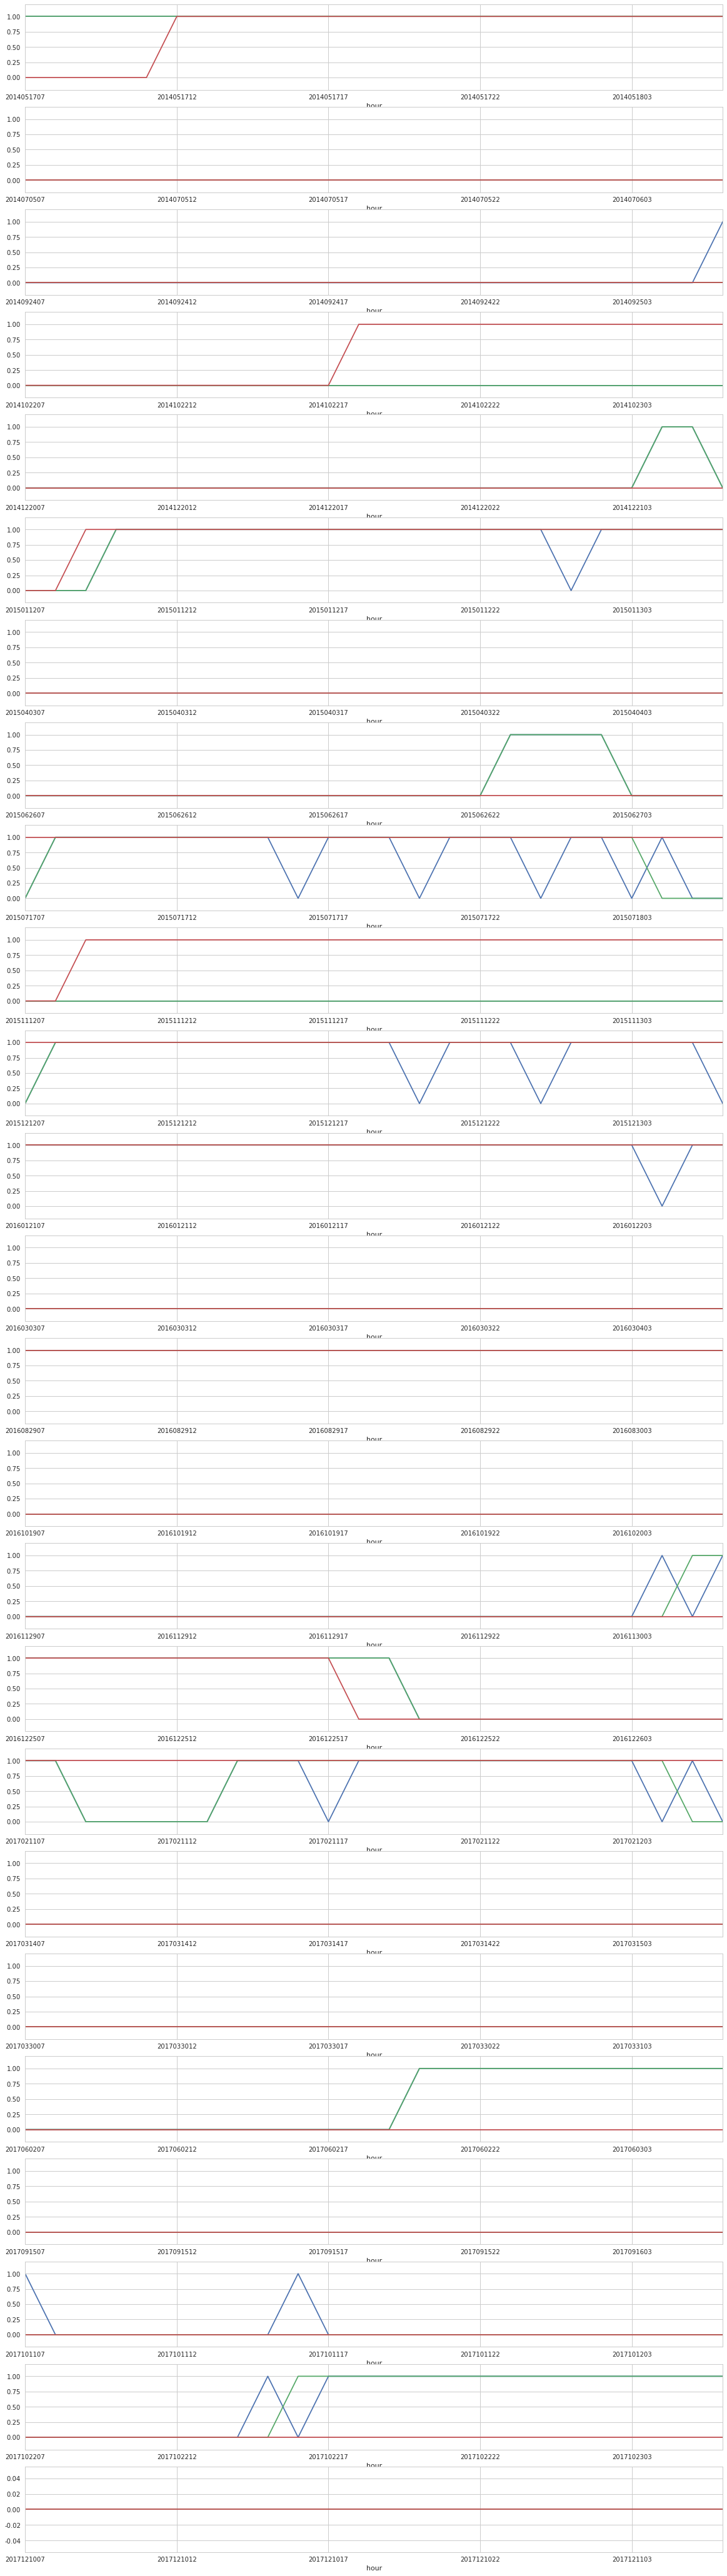

In [51]:
index = 0
for i in range(25):
    index = i*24
    plt.ylim(ymax=1.2,ymin=-0.2)
    plt.subplot(25,1,i+1)
    test.iloc[index:index+24]['pred'].plot()
    test.iloc[index:index+24]['smoth_pred'].plot()
    test.iloc[index:index+24]['swell(t+1)'].apply(lambda x:1 if x==2 else 0).plot()
    

In [52]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
0        600 non-null int64
1        600 non-null float64
swell    600 non-null int64
dtypes: float64(1), int64(2)
memory usage: 14.1 KB


In [53]:
index=24
test.iloc[index:index+24].T

hour,2014070507,2014070508,2014070509,2014070510,2014070511,2014070512,2014070513,2014070514,2014070515,2014070516,...,2014070521,2014070522,2014070523,2014070600,2014070601,2014070602,2014070603,2014070604,2014070605,2014070606
index,4368.0,4369.0,4370.0,4371.0,4372.0,4373.0,4374.0,4375.0,4376.0,4377.0,...,4382.0,4383.0,4384.0,4385.0,4386.0,4387.0,4388.0,4389.0,4390.0,4391.0
22453_파주기(sec),5.7,5.5,5.7,6.1,6.2,5.9,6.3,5.9,5.9,6.4,...,6.6,6.5,6.4,6.1,5.9,5.9,6.0,6.1,6.1,6.2
22105_파주기(sec),7.1,5.8,7.1,7.1,6.4,6.4,6.4,7.1,6.4,6.4,...,6.4,6.4,6.4,5.8,7.1,6.4,6.4,6.4,6.4,6.4
22106_파주기(sec),7.1,6.4,6.4,7.1,7.1,7.1,7.1,7.1,7.1,7.1,...,6.4,7.1,7.1,6.4,6.4,7.1,6.4,6.4,6.4,7.1
21229_파주기(sec),6.4,5.8,6.4,6.4,5.8,6.4,6.4,6.4,6.4,6.4,...,6.4,6.4,5.8,6.4,5.8,6.4,6.4,5.8,6.4,6.4
swell(t+1),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
smoth_pred,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
eval_metric = evaluation(df['swell(t+1)'].apply(output_change))

In [55]:
scores = []
for day in range(25):
    st = day*24
    print(st)
    scores.append(eval_metric.evaluate(test['smoth_pred'][st:st + 24]))
    
ori_scores = []
for day in range(25):
    st = day*24
#     print(st)
    ori_scores.append(eval_metric.evaluate(test['pred'][st:st + 24]))

print(ori_scores)
print(scores)

0
 2    18
 0     3
-1     3
dtype: int64
24
1    24
dtype: int64
48
1    24
dtype: int64
72
-2    12
 1    12
dtype: int64
96
 1    22
-1     2
dtype: int64
120
2    20
1     2
0     2
dtype: int64
144
1    24
dtype: int64
168
 1    20
-1     4
dtype: int64
192
2    20
0     3
1     1
dtype: int64
216
-2    21
 1     3
dtype: int64
240
2    22
0     2
dtype: int64
264
2    23
0     1
dtype: int64
288
1    24
dtype: int64
312
2    23
0     1
dtype: int64
336
1    24
dtype: int64
360
 1    22
-1     2
dtype: int64
384
2    11
1    11
0     2
dtype: int64
408
 2    17
 0     5
 1     1
-2     1
dtype: int64
432
1    24
dtype: int64
456
1    24
dtype: int64
480
 1    13
-1    11
dtype: int64
504
1    24
dtype: int64
528
1    24
dtype: int64
552
-1    15
 1     9
dtype: int64
576
1    24
dtype: int64
 2    18
 0     3
-1     3
dtype: int64
1    24
dtype: int64
 1    23
-1     1
dtype: int64
-2    12
 1    12
dtype: int64
 1    22
-1     2
dtype: int64
2    19
0     3
1     2
dtype: int64
1

In [56]:
np.sum(scores)

559